# UTS (KLASIFIKASI ABSTRAK PTA)

Klasifikasi abstrak merupakan proses penggolongan sebuah abstrak kedalam suatu kelas tertentu, pada uts ini ditentukan abstrak akan diklasifikasikan kedalam 3 kelas RPL, Komputasi dan PBA.

Proses pengambilan data abstrak dilakukan pada tugas 1 yaitu Crawling Web. berikut link : [Tugas 1 Crawling Web](https://hamedayani114.github.io/prosaindata/tugas1_webscrapper.html)

setelah proses crawling, data abstrak yang didapatkan akan di beri label kelas sesuai isi secara manual yang akan digunakan sebagai dataset learning.

proses klasifikasi, mulai dari prepocessing data (pembersihan data, tokenisasi kata, stopword, steamming). selanjutnya proses pembobotan kata dengan metode tfidf, proses reduksi dimensi (mengurangi fitur agar proses learning tidak berat). proses learning, testing dan evaluasi hasil model/

## Read data PTA mentah

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [57]:
# df = pd.read_excel('pta_mentah.xlsx')
df = pd.read_csv('https://raw.githubusercontent.com/HamedAyani114/dataset/main/csv/Data_PTA_mentah.csv')
df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


In [58]:
df.shape

(853, 5)

## Data Cleanning

### Eksplorasi data dan Cleaning

In [59]:
df.isnull().sum()

NPM         0
Judul       6
Abstrak    25
Prodi       0
Label      43
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.shape

(810, 5)

In [62]:
import re, string

# Cleaning
def cleaning(text):
    # Remove HTML tags
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub(' ', text)

    # Case folding
    text = (text.lower()) 

    # Trim text (Menghapus semua spasi dari teks kecuali spasi tunggal di antara kata-kata)
    text = text.strip()

    # Remove punctuations, special characters, and double whitespace
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)
    return text

In [63]:
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))
df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))

In [64]:
df.shape

(810, 5)

In [65]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [66]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [67]:
df.dropna(inplace=True)

In [68]:
df.shape

(810, 5)

In [69]:
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label
728,120411100015,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Teknik Informatika,komputasi


In [70]:
# Hapus data duplikat
df.drop_duplicates(subset=['Judul'], inplace=True)

# Apakah masih terdapat duplikasi pada kolom "Judul"?
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


In [71]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [72]:
df.shape

(809, 5)

### Tokenization

In [73]:
import nltk
nltk.download('popular', quiet=True)
from nltk.tokenize import word_tokenize

In [74]:
df.shape

(809, 5)

In [75]:
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df['abstrak_tokens']

0      [sistem, informasi, akademik, siakad, merupaka...
1      [berjalannya, koneksi, jaringan, komputer, den...
2      [web, server, adalah, sebuah, perangkat, lunak...
3      [penjadwalan, kuliah, di, perguruan, tinggi, m...
4      [seiring, perkembangan, teknologi, yang, ada, ...
                             ...                        
848    [investasi, saham, selama, ini, memiliki, resi...
849    [information, retrieval, ir, merupakan, pengam...
850    [klasifikasi, citra, merupakan, proses, pengel...
851    [identifikasi, atribut, pejalan, kaki, merupak...
852    [topik, deteksi, objek, telah, menarik, perhat...
Name: abstrak_tokens, Length: 809, dtype: object

### Stopword

In [76]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))

In [77]:
df['abstrak_tokens']=df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

### Stemming

proses steamming merupakan proses untuk mengubah dari kata yang ber imbuhan menjadi kata dasar. proses ini memakan waktu yang cukup lama, maka dari itu proses steamming secara default saya tidak gunakan dengan alasan waktu komputasi yang sangat lama, dan hasil evaluasi model menunjukan perbedaan yang tidak terlalu signifikan.

In [78]:
!pip install Sastrawi --quiet

In [79]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [80]:
# df['abstrak_tokens']=df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

## export data bersih

In [81]:
# df['abstrak_tokens']=df['abstrak_tokens'].apply(lambda x: ' '.join(x))

In [82]:
df.to_csv('DataOlah_Pta_clean.csv', index=False)

## Read data bersih PTA prepo

In [83]:
dfnw=pd.read_csv('DataOlah_Pta_clean.csv')
dfnw.head()

,NPM,Judul,Abstrak,Prodi,Label,abstrak_tokens
0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,"['sistem', 'informasi', 'akademik', 'siakad', ..."
1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"['berjalannya', 'koneksi', 'jaringan', 'komput..."
2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"['web', 'server', 'perangkat', 'lunak', 'serve..."
3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,"['penjadwalan', 'kuliah', 'perguruan', 'komple..."
4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"['seiring', 'perkembangan', 'teknologi', 'didu..."


In [84]:
dfnw['Label'].value_counts()

komputasi    572
RPL          198
PBA           39
Name: Label, dtype: int64

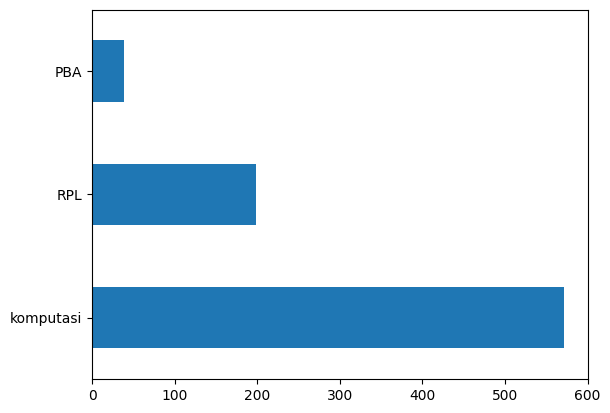

In [85]:
# Distribusi Kelas
dfnw['Label'].value_counts().plot(kind='barh')
plt.show()

In [86]:
X = dfnw['abstrak_tokens']
y = dfnw['Label']

## Pembobotan Kata

### Word2Vec

In [87]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [88]:
# Word2Vec modeling. 
# model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
X_array=dfnw['abstrak_tokens'].apply(lambda x: word_tokenize(x))
model_X_word2vec = Word2Vec(sentences=X_array, vector_size=100, window=5, min_count=1, workers=4)

In [89]:
model_X_word2vec.predict_output_word("klasifikasi")

[("'penyakit", 0.00014393336),
 ("'funduspenelitian", 0.00014001691),
 ("'denganmencari", 0.00013938018),
 ("'jangkauan", 0.00013912078),
 ("'manualkunci", 0.00013722166),
 ("'tingkatakurasi", 0.00013709809),
 ("'url", 0.0001351719),
 ("'fasenya", 0.00013466485),
 ("'terapan", 0.00013456275),
 ("'lainyakata", 0.00013453458)]

### TF-IDF

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(X) 
X_countvector = count_vectorizer.fit_transform(X)

In [91]:
terms_tfidf = tfidf_vectorizer.get_feature_names_out()
terms_countvector = count_vectorizer.get_feature_names_out()

sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms_tfidf):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

           term       rank
8047     sistem  31.061817
1249      citra  27.979721
5470     metode  27.394026
1508       data  26.580455
2979      hasil  20.897761
...         ...        ...
7337      rapih   0.047058
303    analyzer   0.037808
8946  troughput   0.037808
9307  wireshark   0.037808
7793    seirver   0.037808

[9396 rows x 2 columns]


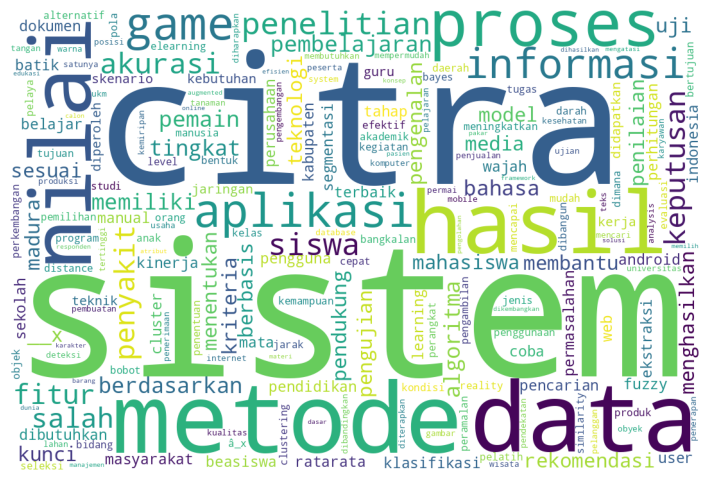

In [92]:
# plot to wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', width=1080, height=720).generate_from_frequencies(dict(zip(ranking['term'], ranking['rank'])))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Reduksi Dimensi

In [93]:
print("shape X_tfidf :", X_tfidf.shape)
# print("shape X_countvector :", X_countvector.shape)

shape X_tfidf : (809, 9396)


In [94]:
X_tfidf_array=X_tfidf.toarray()
X_tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03312095, 0.        , 0.        , ..., 0.0354924 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
X_tfidf_array.shape

(809, 9396)

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_tfidf_pca = pca.fit_transform(X_tfidf_array)

In [97]:
X_tfidf_pca.shape

(809, 100)

proses pca mengurangi dari 6442 fitur, menjadi 100 fitur

## Split Data

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_pca, y, test_size=0.25, random_state=42)

## Model

### Model Naive Bayes

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print('Accuracy score : ', accuracy_score(y_test, y_pred_gnb))
print('Precision score : ', precision_score(y_test, y_pred_gnb, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred_gnb, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred_gnb, average='weighted'))

Accuracy score :  0.7733990147783252
Precision score :  0.8170416638195044
Recall score :  0.7733990147783252
F1 score :  0.7857974671897899


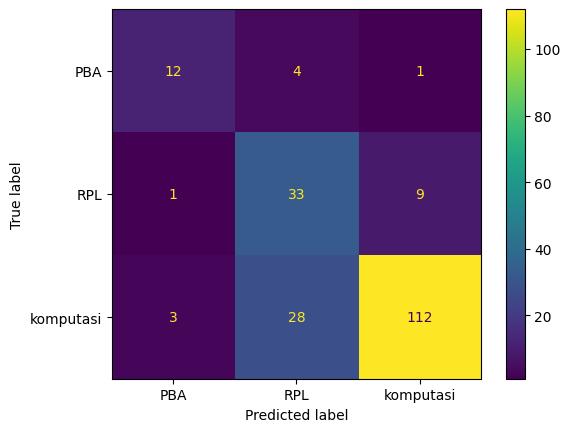

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb)
plt.show()

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         PBA       0.75      0.71      0.73        17
         RPL       0.51      0.77      0.61        43
   komputasi       0.92      0.78      0.85       143

    accuracy                           0.77       203
   macro avg       0.73      0.75      0.73       203
weighted avg       0.82      0.77      0.79       203



### Model KNN

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print('Accuracy score : ', accuracy_score(y_test, y_pred_knn))
print('Precision score : ', precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred_knn, average='weighted'))

Accuracy score :  0.8078817733990148
Precision score :  0.8128434592227696
Recall score :  0.8078817733990148
F1 score :  0.804834918375709


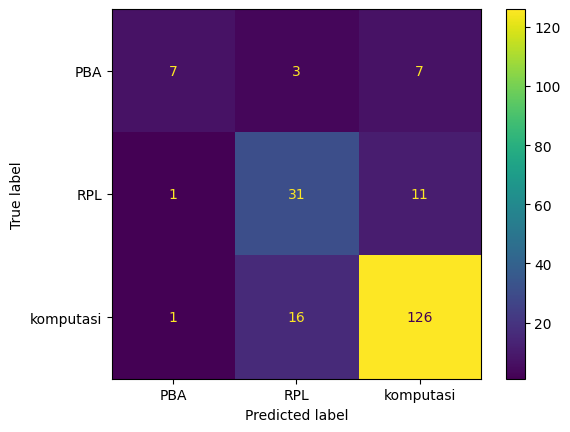

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         PBA       0.78      0.41      0.54        17
         RPL       0.62      0.72      0.67        43
   komputasi       0.88      0.88      0.88       143

    accuracy                           0.81       203
   macro avg       0.76      0.67      0.69       203
weighted avg       0.81      0.81      0.80       203



Tes Model

In [105]:
# str_abstrak = input("Masukkan Abstraksi:\n")

# hasil = dtc.predict(tfidf_vectorizer.transform([str_abstrak]))

# print("Klasifikasi topik: " + "".join(hasil))

## Export Model

In [106]:
# from joblib import dump
# dump(gnb, filename="pta-tfidf_pca_gnb-model.joblib")